In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
import numpy as np

In [3]:
def conv_1d(x: '1d-array of floats', f: '1d-array of floats') -> 'array of floats':
    """ 
        len(f) is supposed to be odd: len(f) = 2r + 1
        len(x) is supposed to be greater than or equal to r + 1: len(x) >= r + 1
        conv_1d returns convolution of x and f as 1d-array of floats
    """
    n = len(x)
    r = len(f) // 2
    #  -r  ...   -1     0     1    ...   r
    # f[0] ... f[r-1] f[r] f[r+1]  ... f[2r]
    M = 2*r + n
    tmp = np.zeros(M)
    # tmp[0] ... tmp[r-1] | tmp[r] ... tmp[n+r-1] | tmp[n+r] ... tmp[n+2r-1]
    #   0    ...    0     |  x[0]  ...    x[n]    |     0    ...      0
    ans = np.zeros(n)
    for i in range(r, n+r):
        tmp[i] = x[i-r]
    for i in range(n):
        for j in range(-r, r+1):
            ans[i] += tmp[i+r+j]*f[r+j]
    return ans

In [4]:
def conv_2d(X: '2d-array of floats', f: '1d-array of floats') -> 'array of floats':
    """ 
        len(f) is supposed to be odd: len(f) = 2r + 1
        Let x.shape be (m,n).
        m and n are supposed to be greater than or equal to r + 1
        conv_2d returns convolution of X and f as 2d-array of floats
    """
    (m,n) = X.shape
    Y = np.zeros(X.shape)
    for i in range(m):
        Y[i,:] = conv_1d(X[i,:], f)
    for j in range(n):
        Y[:,j] = conv_1d(Y[:,j], f)
    return Y

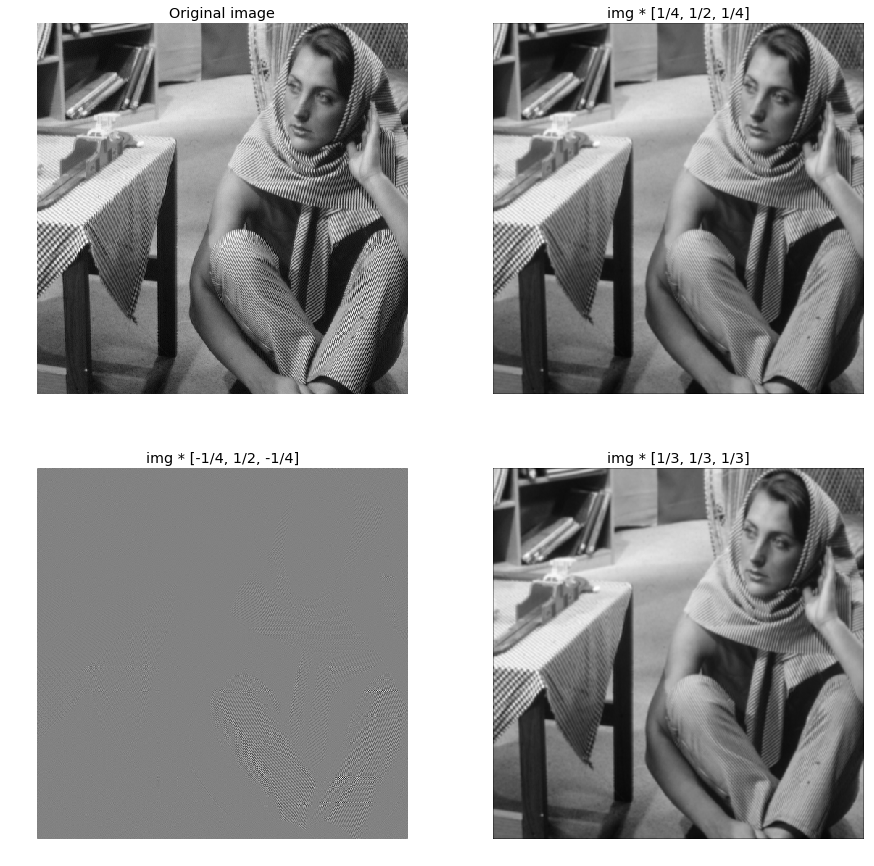

In [5]:
img = mpimg.imread('barbara.png')
fig, axarr = plt.subplots(2, 2, figsize = (15, 15))
axarr[0,0].imshow(img, cmap='gray')
axarr[0,0].set_title('Original image')

g = np.array([1/4, 1/2, 1/4])
axarr[0,1].imshow(conv_2d(img, g), cmap='gray')
axarr[0,1].set_title('img * [1/4, 1/2, 1/4]')

h = np.array([-1/4, 1/2, -1/4])
axarr[1,0].imshow(conv_2d(img, h), cmap='gray')
axarr[1,0].set_title('img * [-1/4, 1/2, -1/4]')

f = np.array([1/3, 1/3, 1/3])
axarr[1,1].imshow(conv_2d(img, f), cmap='gray')
axarr[1,1].set_title('img * [1/3, 1/3, 1/3]')

for i in range(2):
    for j in range(2):
        axarr[i][j].axis('off')